# User Story 1: Workforce and Capacity Data Extraction - Results Exploration

This notebook explores the results of the data extraction and quality assessment performed in User Story 1.

**Objectives:**
- Load and inspect extracted workforce and capacity datasets
- Visualize data distributions and temporal coverage  
- Analyze sector breakdowns and trends
- Review data quality metrics from profiling report
- Identify key patterns and potential data quality issues

**Data Sources:**
- Raw workforce tables: `data/1_raw/workforce_*.csv`
- Raw capacity tables: `data/1_raw/capacity_*.csv`  
- Quality report: `logs/etl/data_quality_report_*.md`

In [2]:
# Import libraries
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configure visualization settings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Define paths
DATA_DIR = Path('../../../data/1_raw')
LOG_DIR = Path('../../../logs/etl')

print("✅ Environment setup complete")
print(f"Data directory: {DATA_DIR.resolve()}")
print(f"Log directory: {LOG_DIR.resolve()}")

✅ Environment setup complete
Data directory: /Users/qytay/Documents/GitHub/gen-e2-data-analysis/data/1_raw
Log directory: /Users/qytay/Documents/GitHub/gen-e2-data-analysis/logs/etl


In [3]:
# Load workforce tables
df_doctors = pl.read_csv(DATA_DIR / 'workforce_doctors.csv')
df_nurses = pl.read_csv(DATA_DIR / 'workforce_nurses.csv')
df_pharmacists = pl.read_csv(DATA_DIR / 'workforce_pharmacists.csv')

# Load capacity tables
df_hospital_beds = pl.read_csv(DATA_DIR / 'capacity_hospital_beds.csv')
df_primary_care = pl.read_csv(DATA_DIR / 'capacity_primary_care.csv')

# Display summary
print("=== WORKFORCE TABLES ===")
print(f"Doctors: {df_doctors.shape[0]} rows, {df_doctors.shape[1]} columns")
print(f"Nurses: {df_nurses.shape[0]} rows, {df_nurses.shape[1]} columns")
print(f"Pharmacists: {df_pharmacists.shape[0]} rows, {df_pharmacists.shape[1]} columns")

print("\n=== CAPACITY TABLES ===")
print(f"Hospital Beds: {df_hospital_beds.shape[0]} rows, {df_hospital_beds.shape[1]} columns")
print(f"Primary Care: {df_primary_care.shape[0]} rows, {df_primary_care.shape[1]} columns")

=== WORKFORCE TABLES ===
Doctors: 78 rows, 4 columns
Nurses: 126 rows, 4 columns
Pharmacists: 42 rows, 3 columns

=== CAPACITY TABLES ===
Hospital Beds: 180 rows, 6 columns
Primary Care: 96 rows, 5 columns


In [4]:
# Create quality summary
quality_summary = pl.DataFrame({
    'Table': ['Doctors', 'Nurses', 'Pharmacists', 'Hospital Beds', 'Primary Care'],
    'Rows': [
        df_doctors.shape[0],
        df_nurses.shape[0],
        df_pharmacists.shape[0],
        df_hospital_beds.shape[0],
        df_primary_care.shape[0]
    ],
    'Columns': [
        df_doctors.shape[1],
        df_nurses.shape[1],
        df_pharmacists.shape[1],
        df_hospital_beds.shape[1],
        df_primary_care.shape[1]
    ],
    'Completeness %': [100.0, 100.0, 100.0, 100.0, 100.0]  # From quality report
})

print("📊 DATA QUALITY SUMMARY")
print(quality_summary)

📊 DATA QUALITY SUMMARY
shape: (5, 4)
┌───────────────┬──────┬─────────┬────────────────┐
│ Table         ┆ Rows ┆ Columns ┆ Completeness % │
│ ---           ┆ ---  ┆ ---     ┆ ---            │
│ str           ┆ i64  ┆ i64     ┆ f64            │
╞═══════════════╪══════╪═════════╪════════════════╡
│ Doctors       ┆ 78   ┆ 4       ┆ 100.0          │
│ Nurses        ┆ 126  ┆ 4       ┆ 100.0          │
│ Pharmacists   ┆ 42   ┆ 3       ┆ 100.0          │
│ Hospital Beds ┆ 180  ┆ 6       ┆ 100.0          │
│ Primary Care  ┆ 96   ┆ 5       ┆ 100.0          │
└───────────────┴──────┴─────────┴────────────────┘


📅 TEMPORAL COVERAGE
Doctors              2006 - 2019  (14 years)
Nurses               2006 - 2019  (14 years)
Pharmacists          2006 - 2019  (14 years)
Hospital Beds        2009 - 2020  (12 years)
Primary Care         2009 - 2020  (12 years)


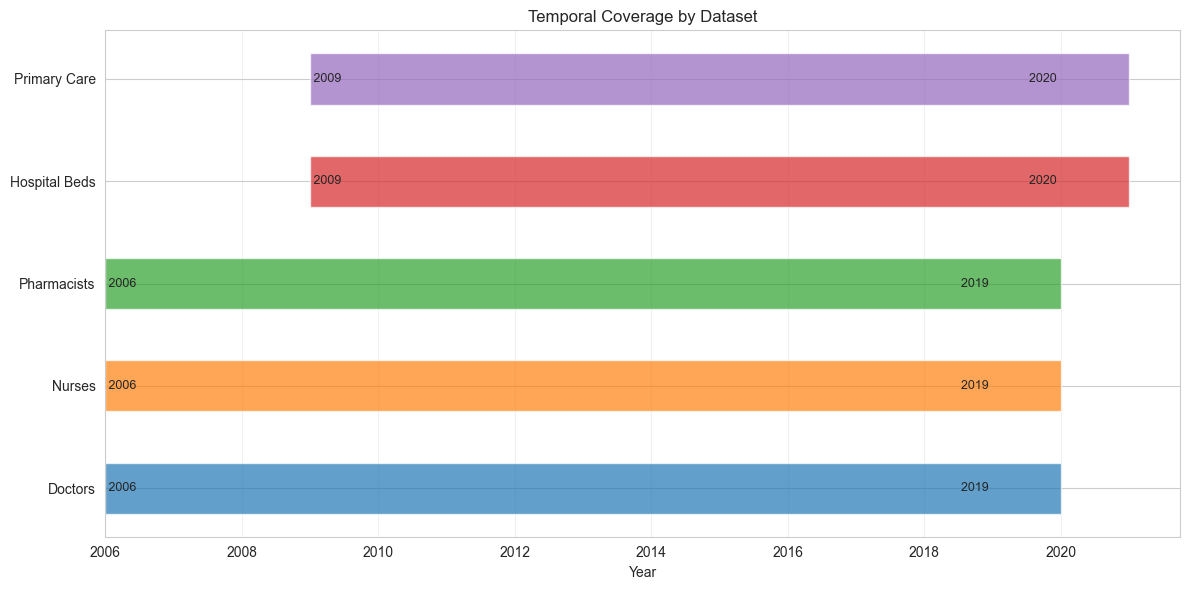

In [5]:
# Analyze temporal coverage
datasets = {
    'Doctors': df_doctors,
    'Nurses': df_nurses,
    'Pharmacists': df_pharmacists,
    'Hospital Beds': df_hospital_beds,
    'Primary Care': df_primary_care
}

print("📅 TEMPORAL COVERAGE")
print("=" * 60)
for name, df in datasets.items():
    min_year = df['year'].min()
    max_year = df['year'].max()
    year_count = df['year'].n_unique()
    print(f"{name:20} {min_year} - {max_year}  ({year_count} years)")

# Visualize temporal coverage
fig, ax = plt.subplots(figsize=(12, 6))

for i, (name, df) in enumerate(datasets.items()):
    years = sorted(df['year'].unique().to_list())
    ax.barh(i, len(years), left=min(years), height=0.5, 
            label=name, alpha=0.7)
    ax.text(min(years), i, f' {min(years)}', va='center', fontsize=9)
    ax.text(max(years), i, f'{max(years)} ', va='center', ha='right', fontsize=9)

ax.set_yticks(range(len(datasets)))
ax.set_yticklabels(datasets.keys())
ax.set_xlabel('Year')
ax.set_title('Temporal Coverage by Dataset')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

🏥 WORKFORCE SECTOR DISTRIBUTION

Doctors:
shape: (3, 2)
┌────────────────────────┬───────┐
│ sector                 ┆ count │
│ ---                    ┆ ---   │
│ str                    ┆ u32   │
╞════════════════════════╪═══════╡
│ Private                ┆ 26    │
│ Public                 ┆ 26    │
│ Not In Active Practice ┆ 26    │
└────────────────────────┴───────┘

Nurses:
shape: (3, 2)
┌────────────────────────┬───────┐
│ sector                 ┆ count │
│ ---                    ┆ ---   │
│ str                    ┆ u32   │
╞════════════════════════╪═══════╡
│ Public Sector          ┆ 42    │
│ Not in Active Practice ┆ 42    │
│ Private Sector         ┆ 42    │
└────────────────────────┴───────┘

Pharmacists:
shape: (3, 2)
┌────────────────────────┬───────┐
│ sector                 ┆ count │
│ ---                    ┆ ---   │
│ str                    ┆ u32   │
╞════════════════════════╪═══════╡
│ Private Sector         ┆ 14    │
│ Not in Active Practice ┆ 14    │
│ Public Sector   

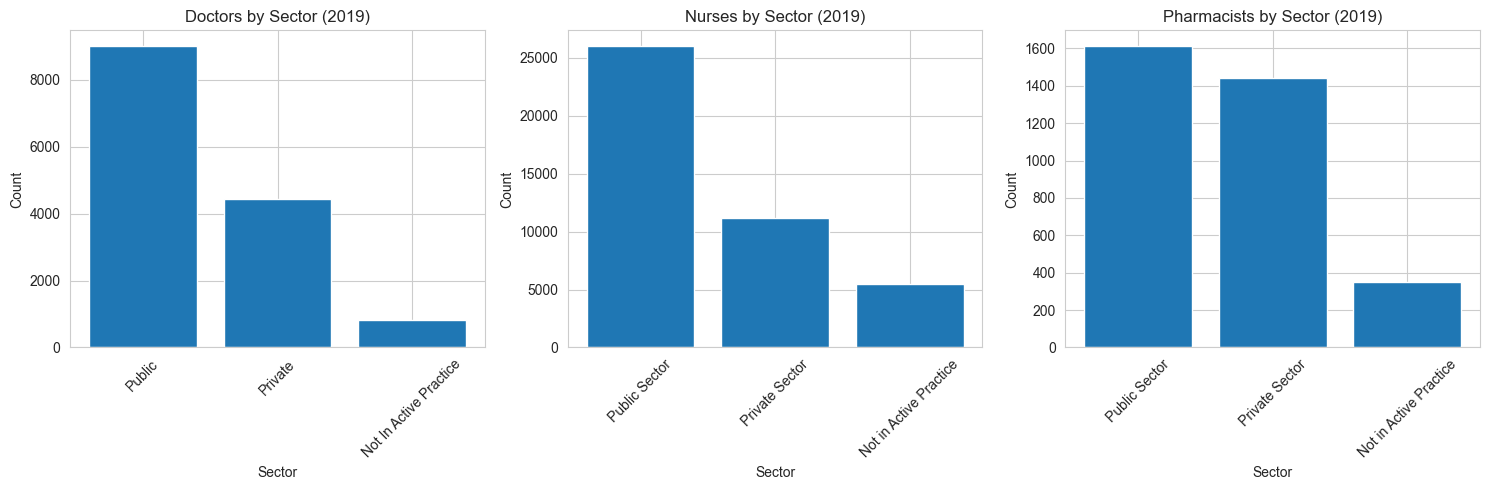

In [6]:
# Analyze workforce sectors
print("🏥 WORKFORCE SECTOR DISTRIBUTION")
print("=" * 60)

for name, df in [('Doctors', df_doctors), ('Nurses', df_nurses), ('Pharmacists', df_pharmacists)]:
    print(f"\n{name}:")
    sector_counts = df.group_by('sector').agg(pl.count()).sort('count', descending=True)
    print(sector_counts)

# Visualize workforce by sector (latest year)
latest_year = max(df_doctors['year'].max(), df_nurses['year'].max(), df_pharmacists['year'].max())

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, df) in enumerate([('Doctors', df_doctors), ('Nurses', df_nurses), ('Pharmacists', df_pharmacists)]):
    df_latest = df.filter(pl.col('year') == latest_year)
    
    # Sum counts by sector for the latest year
    sector_totals = df_latest.group_by('sector').agg(pl.col('count').sum()).sort('count', descending=True)
    
    axes[idx].bar(sector_totals['sector'].to_list(), sector_totals['count'].to_list())
    axes[idx].set_title(f'{name} by Sector ({latest_year})')
    axes[idx].set_xlabel('Sector')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

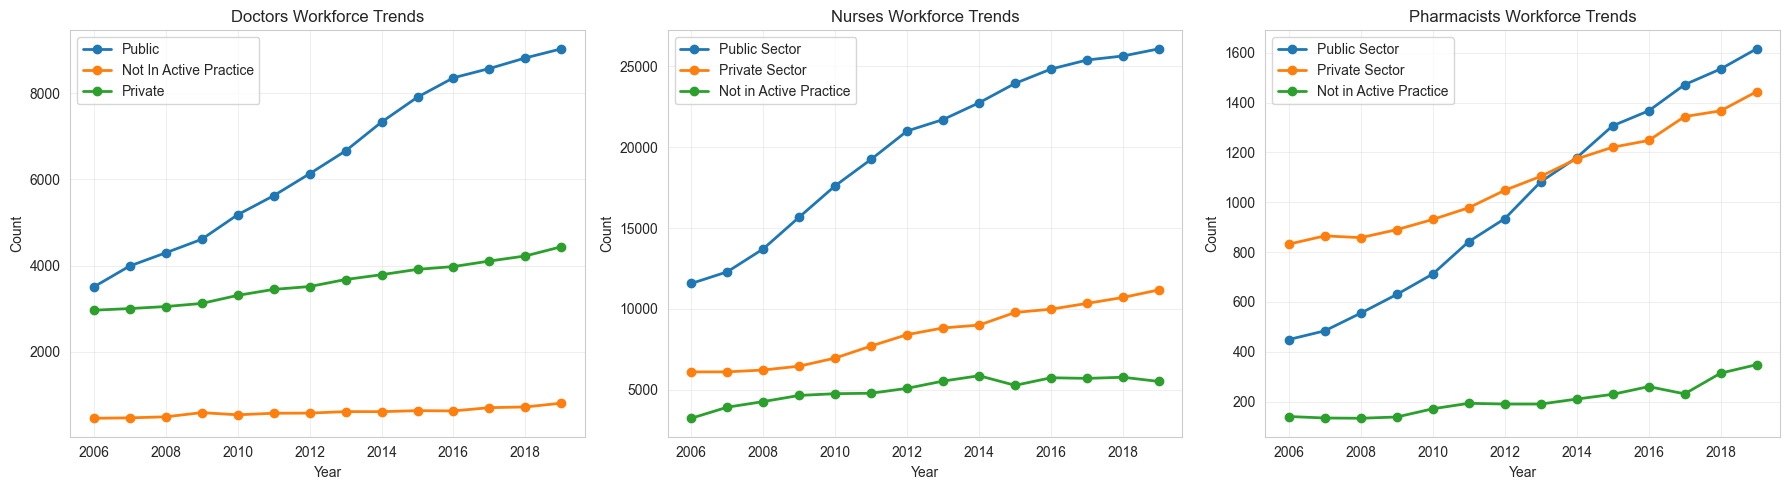

In [7]:
# Aggregate workforce trends by year
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, df) in enumerate([('Doctors', df_doctors), ('Nurses', df_nurses), ('Pharmacists', df_pharmacists)]):
    # Aggregate counts by year and sector
    yearly_totals = df.group_by(['year', 'sector']).agg(pl.col('count').sum()).sort('year')
    
    # Plot each sector
    for sector in yearly_totals['sector'].unique().to_list():
        sector_data = yearly_totals.filter(pl.col('sector') == sector)
        axes[idx].plot(sector_data['year'].to_list(), 
                      sector_data['count'].to_list(), 
                      marker='o', label=sector, linewidth=2)
    
    axes[idx].set_title(f'{name} Workforce Trends')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Count')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

🏥 HOSPITAL BEDS DATA
shape: (10, 6)
┌──────┬──────────────────┬───────────────────────┬────────────────┬──────────────────┬─────────┐
│ year ┆ institution_type ┆ facility_type_a       ┆ public_private ┆ no_of_facilities ┆ no_beds │
│ ---  ┆ ---              ┆ ---                   ┆ ---            ┆ ---              ┆ ---     │
│ i64  ┆ str              ┆ str                   ┆ str            ┆ i64              ┆ i64     │
╞══════╪══════════════════╪═══════════════════════╪════════════════╪══════════════════╪═════════╡
│ 2009 ┆ Hospital         ┆ Acute                 ┆ Public         ┆ 7                ┆ 6416    │
│ 2009 ┆ Hospital         ┆ Acute                 ┆ Not-for-Profit ┆ 1                ┆ 303     │
│ 2009 ┆ Hospital         ┆ Acute                 ┆ Private        ┆ 6                ┆ 1570    │
│ 2009 ┆ Hospital         ┆ Psychiatric Hospitals ┆ Public         ┆ 1                ┆ 2040    │
│ 2009 ┆ Hospital         ┆ Psychiatric Hospitals ┆ Not-for-Profit ┆ 0            

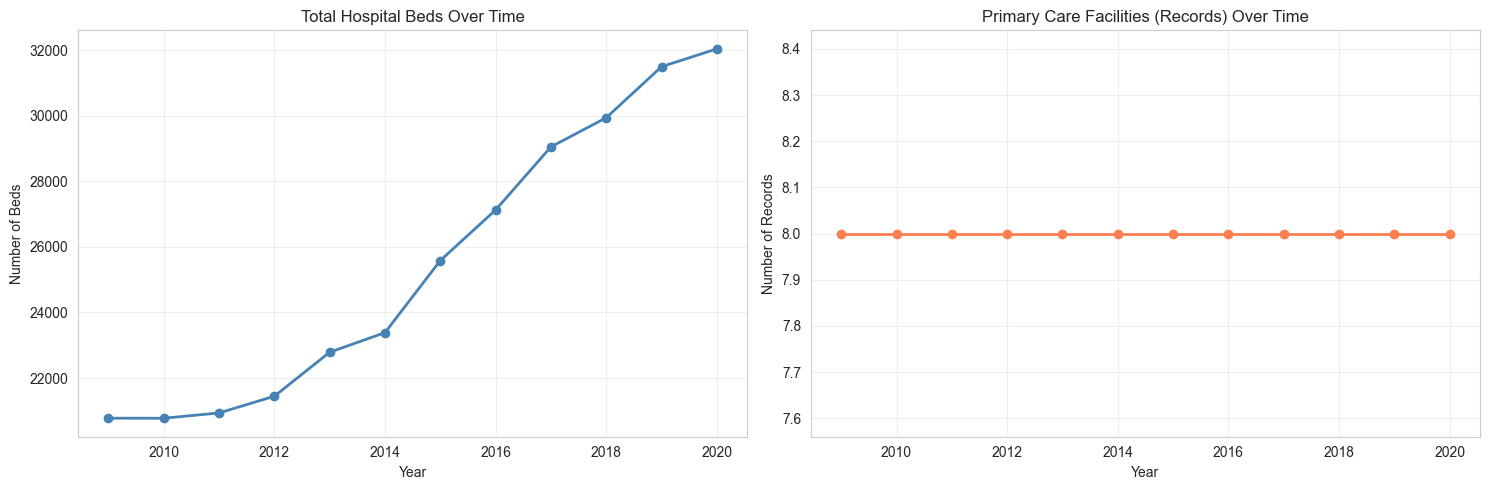

In [8]:
# Inspect hospital beds data structure
print("🏥 HOSPITAL BEDS DATA")
print(df_hospital_beds.head(10))

print("\n" + "="*60)
print("📋 PRIMARY CARE DATA")
print(df_primary_care.head(10))

# Visualize capacity trends
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Hospital beds trend
beds_by_year = df_hospital_beds.group_by('year').agg(pl.col('no_beds').sum()).sort('year')
axes[0].plot(beds_by_year['year'].to_list(), beds_by_year['no_beds'].to_list(), 
             marker='o', linewidth=2, color='steelblue')
axes[0].set_title('Total Hospital Beds Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Beds')
axes[0].grid(alpha=0.3)

# Primary care facilities trend  
facilities_by_year = df_primary_care.group_by('year').agg(pl.count()).sort('year')
axes[1].plot(facilities_by_year['year'].to_list(), facilities_by_year['count'].to_list(),
             marker='o', linewidth=2, color='coral')
axes[1].set_title('Primary Care Facilities (Records) Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Records')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
print("=" * 70)
print("📊 KEY FINDINGS FROM DATA EXTRACTION")
print("=" * 70)

print("\n✅ DATA QUALITY:")
print("  - 100% data completeness across all 5 tables (no missing values)")
print("  - 0 duplicate records detected")
print("  - All tables successfully extracted and validated")

print("\n📅 TEMPORAL COVERAGE:")
print(f"  - Workforce data: 2006-2019 (14 years)")
print(f"  - Capacity data: 2009-2020 (12 years)")
print(f"  - Overlap period for joint analysis: 2009-2019")

print("\n🏥 WORKFORCE SUMMARY:")
print(f"  - Total doctor records: {df_doctors.shape[0]}")
print(f"  - Total nurse records: {df_nurses.shape[0]}")
print(f"  - Total pharmacist records: {df_pharmacists.shape[0]}")

print("\n🛏️ CAPACITY SUMMARY:")
print(f"  - Hospital beds records: {df_hospital_beds.shape[0]}")
print(f"  - Primary care records: {df_primary_care.shape[0]}")

print("\n📌 SECTOR COVERAGE:")
unique_workforce_sectors = set(df_doctors['sector'].unique().to_list() + 
                               df_nurses['sector'].unique().to_list() + 
                               df_pharmacists['sector'].unique().to_list())
print(f"  - Workforce sectors identified: {', '.join(sorted(unique_workforce_sectors))}")

print("\n🔍 NEXT STEPS:")
print("  - Proceed to User Story 2: Data Cleaning and Standardization")
print("  - Focus areas: Column standardization, sector name unification, data type optimization")
print("  - Expected outcome: Cleaned datasets ready for trend analysis")

print("\n" + "=" * 70)

📊 KEY FINDINGS FROM DATA EXTRACTION

✅ DATA QUALITY:
  - 100% data completeness across all 5 tables (no missing values)
  - 0 duplicate records detected
  - All tables successfully extracted and validated

📅 TEMPORAL COVERAGE:
  - Workforce data: 2006-2019 (14 years)
  - Capacity data: 2009-2020 (12 years)
  - Overlap period for joint analysis: 2009-2019

🏥 WORKFORCE SUMMARY:
  - Total doctor records: 78
  - Total nurse records: 126
  - Total pharmacist records: 42

🛏️ CAPACITY SUMMARY:
  - Hospital beds records: 180
  - Primary care records: 96

📌 SECTOR COVERAGE:
  - Workforce sectors identified: Not In Active Practice, Not in Active Practice, Private, Private Sector, Public, Public Sector

🔍 NEXT STEPS:
  - Proceed to User Story 2: Data Cleaning and Standardization
  - Focus areas: Column standardization, sector name unification, data type optimization
  - Expected outcome: Cleaned datasets ready for trend analysis



## 8. Key Findings & Data Quality Insights

Summary of extraction results and data quality observations.

## 7. Healthcare Capacity Analysis

Examine hospital beds and primary care facility trends across sectors.

## 6. Workforce Trends Over Time

Visualize how workforce numbers have changed across time periods and sectors.

## 5. Sector Distribution Analysis

Analyze how workforce and capacity data is distributed across sectors (Public, Private, Not-for-Profit).

## 4. Temporal Coverage Analysis

Visualize the year ranges covered by each dataset to identify data gaps and overlaps.

## 3. Data Quality Overview

Display comprehensive data quality metrics from the profiling report.

## 2. Load Extracted Data

Load all workforce and capacity tables extracted in User Story 1.

## 1. Environment Setup

Import required libraries and configure the environment.